# Hyper-parameter estimation using Scikit-Learn

**Here, I have used Scikit Learn's GridSearch function to learn the best set of hyper-parameters for my NeuralNetwork Model. I have estimated the best combination of the number of hidden units and learning rate.** 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''Importing the Data'''

import NN_Data_FeatureEngineering 

from NN_Data_FeatureEngineering.CreateFeatures import myData

from NN_Data_FeatureEngineering.CreateTestTrain import GenerateTestTrain

NNData = GenerateTestTrain(myData.X,myData.y)

In [3]:
'''Importing the requied module from scikit learn'''

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'hidden_layer_sizes':((5,1),(10,1)),
               'learning_rate_init': [0.05,0.005,0.001]}

Rg = MLPRegressor(solver = 'lbfgs',max_iter=2000,
                   activation='logistic',shuffle=False)

regm = GridSearchCV(Rg,parameters,cv=None,scoring='neg_mean_absolute_error')

In [4]:
'''Fitting the model'''
regm.fit(NNData.Xtrain,NNData.ytrain);

In [5]:
'''Getting the best estimator'''
print(f'The best estimator has {regm.best_estimator_.hidden_layer_sizes[0]} hidden units and a learning rate of {regm.best_estimator_.learning_rate_init}')

The best estimator has 10 hidden units and a learning rate of 0.005


In [6]:
yhat = regm.predict(NNData.Xtest)

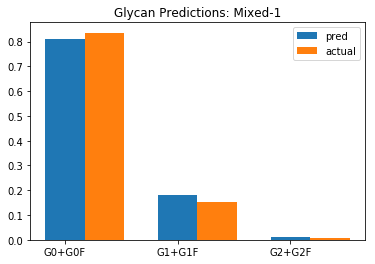

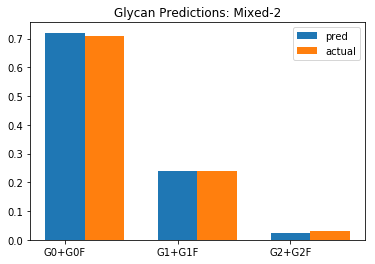

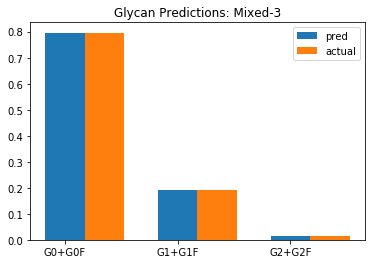

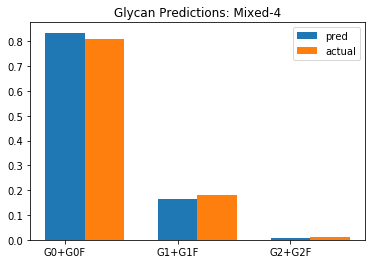

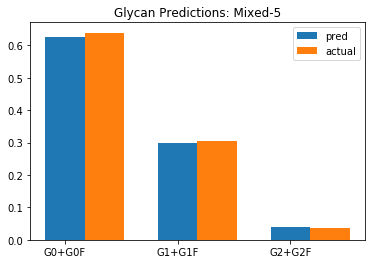

In [7]:
for i in range(len(yhat)):
    plt.figure();
    plt.bar(np.arange(1,len(yhat[0])+1),yhat[i].flatten(),0.35,label='pred');
    plt.bar(np.arange(1,len(yhat[0])+1)+0.35,NNData.ytest[i],0.35,label='actual');
    plt.xticks(np.arange(1,len(yhat[0])+1),['G0+G0F','G1+G1F','G2+G2F'])
    plt.legend();
    plt.title(f'Glycan Predictions: Mixed-{i+1}');